<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [13]:
#importando as bibliotecas necessárias
import seaborn as sns
import matplotlib.pyplot as plt

#carrega o conjunto de dados 'diamonds'
data = sns.load_dataset("diamonds")
data.head()#pra mostrar as primeiras linhas do conjunto de dados

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<ipython-input-14-061380206c7e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x = media_por_corte.index, y = media_por_corte.values, palette = 'pastel')


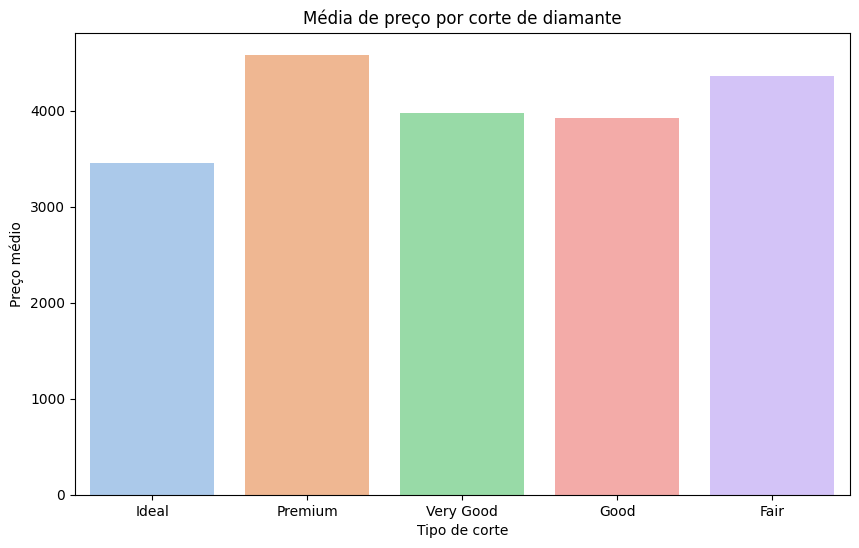

In [14]:
# gráfico do exercício 1

#calcular a média do preço por corte
media_por_corte = data.groupby('cut')['price'].mean()

#ordenar os cortes pela média do preço em ordem decrescente
media_por_corte = media_por_corte.sort_values(ascending = False)
plt.figure(figsize = (10, 6))#definir o tamanho da figura

#criar um gráfico de barras com a média de preço por tipo de corte
grafico = sns.barplot(x = media_por_corte.index, y = media_por_corte.values, palette = 'pastel')

#definir o título e os rótulos dos eixos do gráfico
grafico.set(title = 'Média de preço por corte de diamante', ylabel = 'Preço médio', xlabel = 'Tipo de corte')

plt.show()#exibe o gráfico

**Insight do gráfico 1**: Os cortes Premium e Fair exibem as maiores médias de valores por corte. Os cortes Very Good e Good têm médias semelhantes, enquanto o corte Ideal apresenta o menor preço médio por corte. Além disso, é importante notar que a diferença entre os valores dos cortes não é tão significativa.

---

## 2\. Número de passageiros em dezembro por ano

In [15]:
import seaborn as sns

# Carrega o conjunto de dados "flights"
data = sns.load_dataset("flights")
data.head()# Exibe as primeiras linhas do conjunto de dados

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


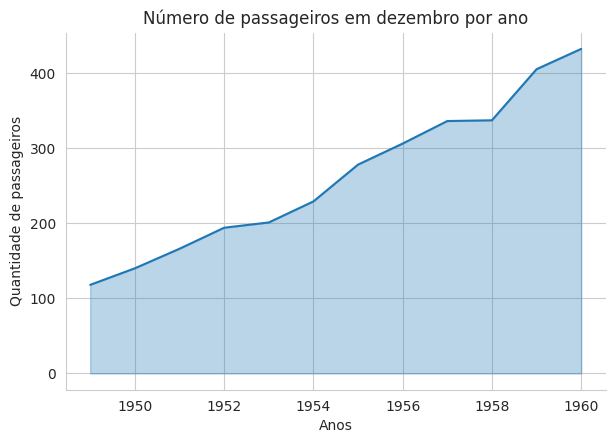

In [16]:
# gráfico do exercício 2

with sns.axes_style('whitegrid'):# Define o estilo dos eixos do gráfico
    # Filtra os dados para obter apenas os registros de dezembro e agrupa por ano somando o número de passageiros
    passageiros_por_ano = data[data['month'] == 'Dec'].groupby('year')['passengers'].sum().reset_index()
    # Cria um FacetGrid para o gráfico
    flights = sns.FacetGrid(data = passageiros_por_ano, palette = 'pastel')
    # Adiciona um gráfico de linha ao FacetGrid
    flights.map(sns.lineplot, 'year', 'passengers')
    # Preenche a área abaixo da linha do gráfico
    flights.map(plt.fill_between, 'year', 'passengers', alpha = 0.3)
    # Define o título e os rótulos dos eixos do gráfico
    flights.set(title = 'Número de passageiros em dezembro por ano', ylabel = 'Quantidade de passageiros', xlabel = 'Anos')
    # Define o tamanho da figura
    flights.fig.set_size_inches(w = 20/2.54, h = 12/2.54)
    plt.show()# Exibe o gráfico


**Insight do gráfico 2**: Observou-se um aumento significativo no número de passageiros durante o mês de dezembro a cada ano. Esse crescimento é notável e sugere uma tendência positiva na demanda de viagens aéreas nesse período

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [17]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<ipython-input-18-20de2bc8a2b1>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  flights = sns.lineplot(data = passageiros_por_mes, x = 'month', y = 'passengers', palette = 'pastel')


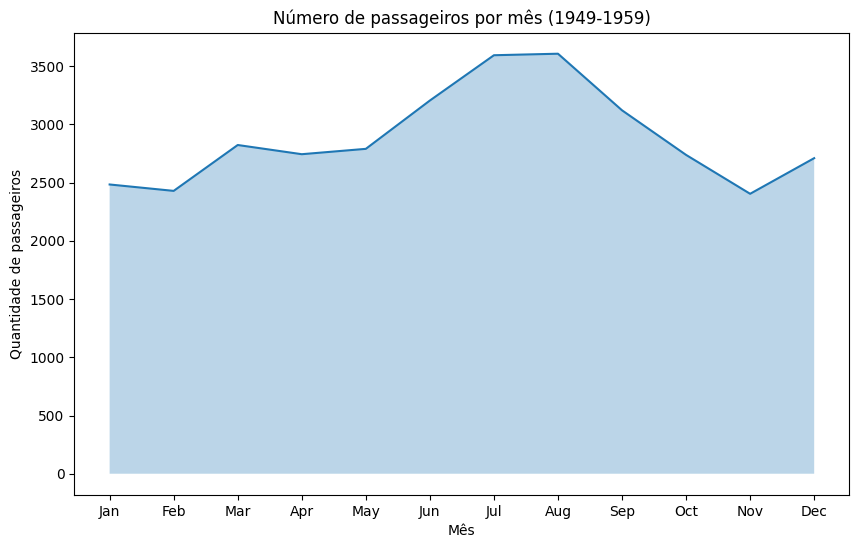

In [18]:
# gráfico do exercício 3

# Filtra os dados para o período entre 1949 e 1959
data_filtrada = data[(data['year'] >= 1949) & (data['year'] <= 1959)]

#agrupar e somar passageiros por mês
passageiros_por_mes = data_filtrada.groupby('month')['passengers'].sum().reset_index()

#Criar o gráfico
plt.figure(figsize = (10, 6))
# Cria um gráfico de linha com o número de passageiros por mês
flights = sns.lineplot(data = passageiros_por_mes, x = 'month', y = 'passengers', palette = 'pastel')
# Preenche a área abaixo da linha do gráfico
plt.fill_between(passageiros_por_mes['month'], passageiros_por_mes['passengers'], alpha = 0.3)
# Define o título e os rótulos dos eixos do gráfico
flights.set(title = 'Número de passageiros por mês (1949-1959)', xlabel = 'Mês', ylabel = 'Quantidade de passageiros')
plt.show()# Exibe o gráfico

**Insight do gráfico 3**: Observou-se que, mensalmente, o número de passageiros ultrapassa a marca de dois mil. Além disso, durante os meses de junho e julho, há um aumento significativo no número de passageiros, seguido por uma queda no início de novembro e uma alta novamente em dezembro. Essa variação sazonal pode ser relevante para o planejamento e gestão de recursos no setor de transporte aéreo

---